In [1]:
import numpy as np
import pandas as pd
from sklearn.ensemble import ExtraTreesClassifier
import os
from IPython.display import display
import matplotlib.pyplot as plt
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import accuracy_score
from sklearn.metrics import r2_score

In [2]:
train_size = 100000
test_size = 40000
validation_size = 10000
columns = 2351

#path = "../Desktop/ember"
path = "./data"

x_train = np.memmap(path+"/X_train.dat", dtype=np.float32, mode="r", shape=(train_size, 2351))
y_train = np.memmap(path+"/y_train.dat", dtype=np.float32, mode="r", shape=train_size)

x_validation = x_train[70000:90000]
y_validation = y_train[70000:90000]

x_train = x_train[:40000]
y_train = y_train[:40000]


x_test = np.memmap(path+"/X_test.dat", dtype=np.float32, mode="r", shape=(test_size, 2351))
y_test = np.memmap(path+"/y_test.dat", dtype=np.float32, mode="r", shape=test_size)

In [4]:
len(x_train), len(y_train), len(x_validation), len(y_validation)

(40000, 40000, 20000, 20000)

In [5]:
max_features_num = ["auto", 0.2, "log2", "sqrt"] 
scores = []

for num in max_features_num:
    m = ExtraTreesClassifier(n_jobs=-1, n_estimators=40, max_features=num)
    m.fit(x_train, y_train)
    scores.append(m.score(x_validation, y_validation))

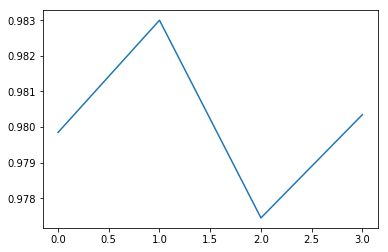

In [6]:
plt.plot(scores)

In [8]:
m = ExtraTreesClassifier(n_jobs=-1, n_estimators=10, max_features="sqrt")
%time m.fit(x_train, y_train)
m.score(x_validation, y_validation)

CPU times: user 6.88 s, sys: 27.9 ms, total: 6.91 s
Wall time: 2.24 s


0.9761

In [9]:
m = ExtraTreesClassifier(n_jobs=-1, n_estimators=10, max_features="auto")
%time m.fit(x_train, y_train)
m.score(x_validation, y_validation)

CPU times: user 7.29 s, sys: 60.2 ms, total: 7.35 s
Wall time: 2.54 s


0.977

In [10]:
m = ExtraTreesClassifier(n_jobs=-1, n_estimators=10, max_features=0.2)
%time m.fit(x_train, y_train)
m.score(x_validation, y_validation)

CPU times: user 1min 30s, sys: 110 ms, total: 1min 30s
Wall time: 28.4 s


0.97965

In [12]:
estimators = [10, 20, 40, 80, 100, 200, 1000]

scores = []

for num in estimators:
    m = ExtraTreesClassifier(n_jobs=-1, n_estimators=num, max_features="auto")
    %time m.fit(x_train, y_train)
    scores.append(m.score(x_validation, y_validation))

CPU times: user 7.13 s, sys: 27.3 ms, total: 7.15 s
Wall time: 2.24 s
CPU times: user 15 s, sys: 14.3 ms, total: 15 s
Wall time: 4.36 s
CPU times: user 29.7 s, sys: 90.2 ms, total: 29.8 s
Wall time: 8.87 s
CPU times: user 59.8 s, sys: 265 ms, total: 1min
Wall time: 17.5 s
CPU times: user 1min 14s, sys: 265 ms, total: 1min 15s
Wall time: 22.3 s
CPU times: user 2min 27s, sys: 1.49 s, total: 2min 29s
Wall time: 41.4 s
CPU times: user 12min 8s, sys: 2.15 s, total: 12min 10s
Wall time: 3min 12s


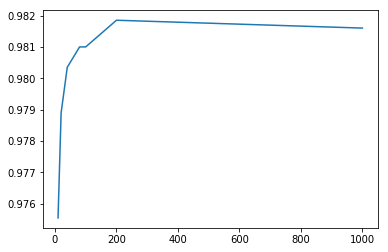

In [13]:
plt.plot(estimators, scores)

In [3]:
leaves = [1, 2, 3, 5, 10, 25, 50]

scores = []

for leaf in leaves:
    m = ExtraTreesClassifier(n_jobs=-1, n_estimators=200, max_features="sqrt", min_samples_leaf=leaf)
    %time m.fit(x_train, y_train)
    scores.append(m.score(x_validation, y_validation))

CPU times: user 2min 28s, sys: 1.91 s, total: 2min 30s
Wall time: 50 s
CPU times: user 2min 18s, sys: 428 ms, total: 2min 19s
Wall time: 41.7 s
CPU times: user 2min 16s, sys: 394 ms, total: 2min 17s
Wall time: 40.5 s
CPU times: user 2min 8s, sys: 314 ms, total: 2min 8s
Wall time: 36.5 s
CPU times: user 2min 1s, sys: 959 ms, total: 2min 2s
Wall time: 34.6 s
CPU times: user 1min 49s, sys: 857 ms, total: 1min 50s
Wall time: 33.1 s
CPU times: user 1min 40s, sys: 553 ms, total: 1min 40s
Wall time: 30.7 s


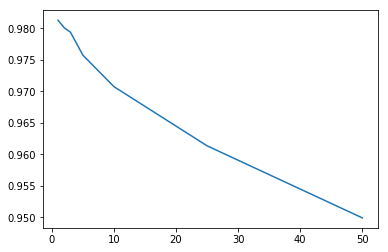

In [4]:
plt.plot(leaves, scores)

In [7]:
m = ExtraTreesClassifier(n_jobs=-1, n_estimators=200, max_features=0.2, min_samples_leaf=1)
%time m.fit(x_train, y_train)
m.score(x_validation, y_validation)

KeyboardInterrupt: 

NotFittedError: Estimator not fitted, call `fit` before exploiting the model.

In [ ]:
model = SelectFromModel(m, prefit=True)